In [6]:
## 방사형 그래프를 그려보자 
from math import pi
import matplotlib.pyplot as plt


# Set data
cat = ['Speed', 'Reliability', 'Comfort', 'Safety', 'Effieciency']
values = [90, 60, 65, 70, 40]

N = len(cat)

x_as = [n / float(N) * 2 * pi for n in range(N)]

# Because our chart will be circular we need to append a copy of the first 
# value of each list at the end of each list with data
values += values[:1]
x_as += x_as[:1]


# Set color of axes
plt.rc('axes', linewidth=0.5, edgecolor="#888888")


# Create polar plot
ax = plt.subplot(111, polar=True)


# Set clockwise rotation. That is:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)


# Set position of y-labels
ax.set_rlabel_position(0)


# Set color and linestyle of grid
ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)


# Set number of radial axes and remove labels
plt.xticks(x_as[:-1], [])

# Set yticks
plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"])


# Plot data
ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)

# Fill area
ax.fill(x_as, values, 'b', alpha=0.3)


# Set axes limits
plt.ylim(0, 100)


# Draw ytick labels to make sure they fit properly
for i in range(N):
       angle_rad = i / float(N) * 2 * pi

    if angle_rad == 0:
        ha, distance_ax = "center", 10
    elif 0 < angle_rad < pi:
        ha, distance_ax = "left", 1
    elif angle_rad == pi:
        ha, distance_ax = "center", 1
    else:
        ha, distance_ax = "right", 1
    ax.text(angle_rad, 100 + distance_ax, cat[i], size=10, horizontalalignment=ha, verticalalignment="center")


# Show polar plot
plt.show()


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 64)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

ax = plt.subplot(111, projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.viridis(r / 10.))
    bar.set_alpha(0.5)

plt.show()

In [4]:
## 더 쉽게 그려보자 
## kaggle의 pokemon.csv 를 이용한 예행연습 
## 출처 https://typewind.github.io/2017/09/29/radar-chart/

# 그래프 초기화 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv("./data/pokemon/pokemon.csv", index_col=0)

display(df)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [ ]:
#386번 포켓몬의 스텟데이터를 뽑아보자 
labels=np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
stats=df.loc[386,labels].values #데오키스 (4가지 형태가 있어 데이터가 4가지로 뽑힘)

display(stats) #ndarray형식으로 결과값이출력


In [ ]:
#극선들 세팅 
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False) # Set the angle

# close the plot
stats=np.concatenate((stats,[stats[0]]))  # Closed
angles=np.concatenate((angles,[angles[0]]))  # Closed

In [ ]:
print(stats)
print(angles)

In [ ]:
# 차트 그리기 
fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, polar=True)   # Set polar axis
ax.plot(angles, stats, 'o-', linewidth=2)  # Draw the plot (or the frame on the radar chart)
ax.fill(angles, stats, alpha=0.25)  #Fulfill the area
ax.set_thetagrids(angles * 180/np.pi, labels)  # Set the label for each axis
ax.set_title([df.loc[386,"Name"]])  # Set the pokemon's name as the title
#ax.set_rlim(0,250)
ax.grid(True)

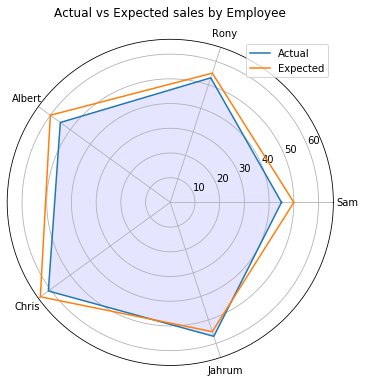

In [3]:
##추가
##이게 젤 간단한듯
#https://www.pythonprogramming.in/plot-polar-graph-in-matplotlib.html
import matplotlib.pyplot as plt
import numpy as np
 
employee = ["Sam", "Rony", "Albert", "Chris", "Jahrum"] #여기에 의원데이터 각 지표명
actual = [45, 53, 55, 61, 57, 45] #여기에 의원데이터 내용
expected = [50, 55, 60, 65, 55, 50] #이건 기대치인데 생략할듯
 
# Initialise the spider plot by setting figure size and polar projection
plt.figure(figsize=(10, 6))
plt.subplot(polar=True)
 
theta = np.linspace(0, 2 * np.pi, len(actual))
 
# Arrange the grid into number of sales equal parts in degrees
lines, labels = plt.thetagrids(range(0, 360, int(360/len(employee))), (employee))
 
# Plot actual sales graph
plt.plot(theta, actual)
plt.fill(theta, actual, 'b', alpha=0.1)
 
# Plot expected sales graph
plt.plot(theta, expected)
 
# Add legend and title for the plot
plt.legend(labels=('Actual', 'Expected'), loc=1)
plt.title("Actual vs Expected sales by Employee")
 
# Dsiplay the plot on the screen
plt.show()